In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\James\Downloads\google-project-sunroof\sunroof_solar_potential_by_censustract.csv")
pd.set_option('display.max_columns', 500)

In [3]:
df.head()

,carbon_offset_metric_tons,count_qualified,existing_installs_count,install_size_kw_buckets,kw_median,kw_total,lat_avg,lat_max,lat_min,lng_avg,lng_max,lng_min,number_of_panels_e,number_of_panels_f,number_of_panels_median,number_of_panels_n,number_of_panels_s,number_of_panels_total,number_of_panels_w,percent_covered,percent_qualified,region_name,state_name,yearly_sunlight_kwh_e,yearly_sunlight_kwh_f,yearly_sunlight_kwh_kw_threshold_avg,yearly_sunlight_kwh_median,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_total,yearly_sunlight_kwh_w
0,2159.887389,586,12,[[0171][5231][10114][1545][2016][252][352][451...,7.25,5219.00,34.267040,34.272362,34.261761,-118.432716,-118.425262,-118.440880,2964,6574,29.0,3159,4352,20876.0,3827,98.121387,86.303387,6037104401,California,1.014756e+06,2.539152e+06,1285.247909,10863.017950,1.075291e+06,1.760043e+06,7.922383e+06,1.533140e+06
1,11392.316227,369,4,[[060][550][1024][1518][2023][2515][3012][3515...,28.00,28391.25,43.156368,43.162289,43.150970,-77.607040,-77.595558,-77.620216,2760,102635,112.0,693,4578,113565.0,2899,98.623853,85.813953,36055009400,New York,7.338827e+05,2.815855e+07,947.750000,30689.598633,1.739810e+05,1.342966e+06,3.117606e+07,7.666855e+05
2,6902.286133,788,3,[[0364][5313][1057][1513][207][258][305][351][...,5.25,7352.25,42.277794,42.288818,42.266918,-89.066589,-89.056992,-89.085197,3841,9963,21.0,535,10649,29409.0,4421,99.359431,56.446991,17201000700,Illinois,1.024630e+06,2.850205e+06,980.050000,5823.500452,1.342642e+05,3.155397e+06,8.337565e+06,1.173068e+06
3,3238.933474,432,1,[[0320][567][1020][1512][251][302][351][401][4...,3.25,3598.25,40.422962,40.428940,40.418259,-79.993729,-79.987312,-80.003838,4920,5001,13.0,299,2529,14393.0,1644,98.687664,38.297872,42003180300,Pennsylvania,1.203715e+06,1.432569e+06,948.600000,3724.817041,7.318190e+04,7.604248e+05,3.912445e+06,4.425539e+05
4,6111.873688,827,32,[[0125][5219][10227][15124][2039][2520][3015][...,11.50,15098.50,33.844044,33.847179,33.839771,-117.933113,-117.922440,-117.941673,5933,31555,46.0,5146,8933,60394.0,8827,100.000000,90.382514,6059086602,California,2.070519e+06,1.183461e+07,1260.550000,16996.447681,1.691435e+06,3.551939e+06,2.241812e+07,3.269615e+06


In [3]:
df.dropna(inplace=True)
#create feature to get average carbon offset for a qualified building
df['unit_offset'] = df['carbon_offset_metric_tons']/df['count_qualified']

#create a feature that determines the average number of panels per building
df['average_panels'] = df['number_of_panels_total']/df['count_qualified']
df['average_panels'] = df['average_panels'].astype(int)

cols_to_drop = ['carbon_offset_metric_tons', 'install_size_kw_buckets',
               'lat_min', 'lat_max', 'lng_min', 'lng_max', 'percent_covered',
               'percent_qualified', 'region_name', 'state_name',
                'yearly_sunlight_kwh_kw_threshold_avg', 'count_qualified', 
               'existing_installs_count', 'yearly_sunlight_kwh_median', 'kw_median',
               'kw_total']
df.drop(cols_to_drop, axis=1, inplace=True)

In [5]:
df.head()

,lat_avg,lng_avg,number_of_panels_e,number_of_panels_f,number_of_panels_median,number_of_panels_n,number_of_panels_s,number_of_panels_total,number_of_panels_w,yearly_sunlight_kwh_e,yearly_sunlight_kwh_f,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_total,yearly_sunlight_kwh_w,unit_offset,average_panels
0,34.267040,-118.432716,2964,6574,29.0,3159,4352,20876.0,3827,1.014756e+06,2.539152e+06,1.075291e+06,1.760043e+06,7.922383e+06,1.533140e+06,3.685815,35
1,43.156368,-77.607040,2760,102635,112.0,693,4578,113565.0,2899,7.338827e+05,2.815855e+07,1.739810e+05,1.342966e+06,3.117606e+07,7.666855e+05,30.873486,307
2,42.277794,-89.066589,3841,9963,21.0,535,10649,29409.0,4421,1.024630e+06,2.850205e+06,1.342642e+05,3.155397e+06,8.337565e+06,1.173068e+06,8.759246,37
3,40.422962,-79.993729,4920,5001,13.0,299,2529,14393.0,1644,1.203715e+06,1.432569e+06,7.318190e+04,7.604248e+05,3.912445e+06,4.425539e+05,7.497531,33
4,33.844044,-117.933113,5933,31555,46.0,5146,8933,60394.0,8827,2.070519e+06,1.183461e+07,1.691435e+06,3.551939e+06,2.241812e+07,3.269615e+06,7.390416,73


Text(0.5, 1, 'Correlation Matrix of Project Sunroof Data Features')

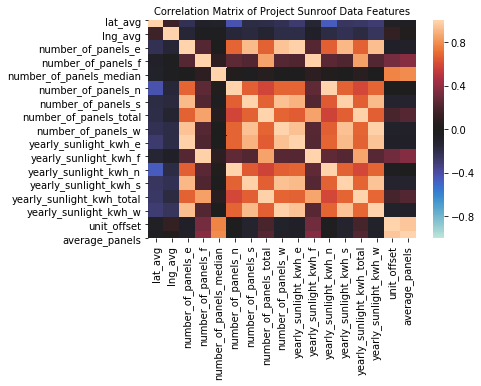

In [29]:
corr = df.corr()

sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0
)
plt.title('Correlation Matrix of Project Sunroof Data Features', size=10)

(0, 100)

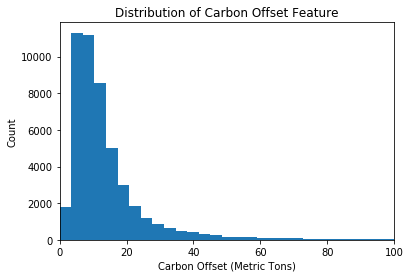

In [7]:
plt.hist(df['unit_offset'], bins=300)
plt.title('Distribution of Carbon Offset Feature')
plt.ylabel('Count')
plt.xlabel('Carbon Offset (Metric Tons)')
plt.xlim(0,100)

# Baseline and quick first model for predicting offset

In [7]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pickle

In [37]:
target = 'unit_offset'
features = ['lat_avg', 'lng_avg', 'number_of_panels_median']

offset_df = df[features].copy()
offset_df[target] = df[target].copy()

In [38]:
train, test = train_test_split(offset_df, random_state=13, train_size=.8, test_size=.2)

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [39]:
baseline = train[target].mean()
y_pred = [baseline] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mea for the baseline is: {mae}')
print(f'The r^2 score for the baseline is: {r2}')

The mea for the baseline is: 10.08793041926716
The r^2 score for the baseline is: -0.00016840109870464026


In [40]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mea for the Linear Regression is: {mae}')
print(f'The r^2 score for the Linear Regression is: {r2}')

The mea for the Linear Regression is: 7.348474749441606
The r^2 score for the Linear Regression is: 0.5354983684330157


In [41]:
model = RandomForestRegressor(n_estimators=150, min_samples_leaf=3, random_state=13, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mea for the Random Forest is: {mae}')
print(f'The r^2 score for the Random Forest is: {r2}')

The mea for the Random Forest is: 5.541565355756868
The r^2 score for the Random Forest is: 0.7002448916051074


In [44]:
filename = 'carbon_offset.pkl'
pickle.dump(model, open(filename, 'wb'))

# Determining how to stack my models for the second objective

### First model, predicts yearly sunlight total

In [14]:
target = 'yearly_sunlight_kwh_total'
features = ['lat_avg', 'lng_avg', 'average_panels']
dftest = df[features].copy()
dftest[target] = df[target].copy()


In [15]:
dftest.head()

,lat_avg,lng_avg,average_panels,yearly_sunlight_kwh_total
0,34.267040,-118.432716,35,7.922383e+06
1,43.156368,-77.607040,307,3.117606e+07
2,42.277794,-89.066589,37,8.337565e+06
3,40.422962,-79.993729,33,3.912445e+06
4,33.844044,-117.933113,73,2.241812e+07


In [18]:
train, test = train_test_split(dftest, random_state=13, train_size=.8, test_size=.2)

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

# Baseline and basic model

In [32]:
baseline = y_train.mean()
y_pred = [baseline] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mea for the baseline is: {mae}')
print(f'The r^2 score for the baseline is: {r2}')

The mea for the baseline is: 14739776.694312477
The r^2 score for the baseline is: -0.00021706977366031666


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mea for the Linear Regression is: {mae}')
print(f'The r^2 score for the Linear Regression is: {r2}')

The mea for the Linear Regression is: 13256234.78604367
The r^2 score for the Linear Regression is: 0.13073358660784085


In [19]:
lay1_model = RandomForestRegressor(n_estimators=150, min_samples_leaf=3,
                              n_jobs=-1, random_state=13)

In [20]:
lay1_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                      oob_score=False, random_state=13, verbose=0,
                      warm_start=False)

In [21]:
y_pred = lay1_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mea for the Random Forest is: {mae}')
print(f'The r^2 score for the Random Forest is: {r2}')

The mea for the Random Forest is: 10412471.972081
The r^2 score for the Random Forest is: 0.35715178644869894


(0, 150000000.0)

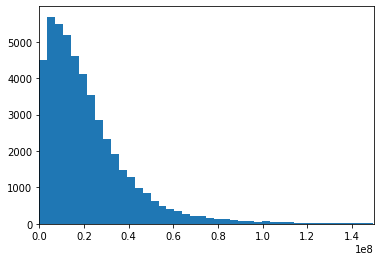

In [18]:
plt.hist(df['yearly_sunlight_kwh_total'], bins=150)
plt.xlim(0,1.5e8)

In [22]:
#remove highest 2% and lowest 1% yearly sunlight
bottom = dftest.sort_values(by='yearly_sunlight_kwh_total')[:486].index
top = dftest.sort_values(by='yearly_sunlight_kwh_total')[47202:].index

dftest.drop(bottom,inplace=True)
dftest.drop(top, inplace=True)
dftest.shape

(46716, 4)

In [23]:
train, test = train_test_split(dftest, random_state=13, train_size=.8, test_size=.2)

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [24]:
lay1_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                      oob_score=False, random_state=13, verbose=0,
                      warm_start=False)

In [25]:
y_pred = lay1_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the Random Forest is: {mae}')
print(f'The r^2 score for the Random Forest is: {r2}')

The mae for the Random Forest is: 7888515.728943537
The r^2 score for the Random Forest is: 0.43903281663075977


In [11]:
df['yearly_sunlight_kwh_total'].describe()

count    4.866400e+04
mean     2.234360e+07
std      2.262537e+07
min      2.178341e+03
25%      8.361908e+06
50%      1.686481e+07
75%      2.916793e+07
max      5.339304e+08
Name: yearly_sunlight_kwh_total, dtype: float64

In [158]:
filename = 'sunlight_total.pkl'
pickle.dump(lay1_model, open(filename, 'wb'))

# Next Step: predict sunlight for each direction

In [8]:
features = ['lat_avg', 'lng_avg', 'average_panels',
             'yearly_sunlight_kwh_total']
yearly_sun = ['yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_e', 
             'yearly_sunlight_kwh_s', 'yearly_sunlight_kwh_w',
             'yearly_sunlight_kwh_f']
lev2_features = features + yearly_sun
lev2_df = df[lev2_features].copy()
lev2_df.head()

,lat_avg,lng_avg,average_panels,yearly_sunlight_kwh_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_e,yearly_sunlight_kwh_s,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f
0,34.267040,-118.432716,35,7.922383e+06,1.075291e+06,1.014756e+06,1.760043e+06,1.533140e+06,2.539152e+06
1,43.156368,-77.607040,307,3.117606e+07,1.739810e+05,7.338827e+05,1.342966e+06,7.666855e+05,2.815855e+07
2,42.277794,-89.066589,37,8.337565e+06,1.342642e+05,1.024630e+06,3.155397e+06,1.173068e+06,2.850205e+06
3,40.422962,-79.993729,33,3.912445e+06,7.318190e+04,1.203715e+06,7.604248e+05,4.425539e+05,1.432569e+06
4,33.844044,-117.933113,73,2.241812e+07,1.691435e+06,2.070519e+06,3.551939e+06,3.269615e+06,1.183461e+07


In [9]:
bottom = lev2_df.sort_values(by='yearly_sunlight_kwh_total')[:486].index
top = lev2_df.sort_values(by='yearly_sunlight_kwh_total')[47689:].index

lev2_df.drop(bottom,inplace=True)
lev2_df.drop(top, inplace=True)
train, test = train_test_split(lev2_df, random_state=13, train_size=.8, test_size=.2)

## Train a model for each direction

In [8]:
target = 'yearly_sunlight_kwh_n'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 610112.8989753827
The r^2 score for the model is: 0.5226421321692774


In [20]:
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, random_state=13, n_jobs=-1)

In [21]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 762061.7411098783
The r^2 score for the model is: 0.8658674163842468


In [22]:
filename = 'sunlight_n.pkl'
pickle.dump(model, open(filename, 'wb'))

In [14]:
target = 'yearly_sunlight_kwh_e'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

model = RandomForestRegressor(n_estimators=100, min_samples_leaf=2, random_state=13, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 685133.4312597243
The r^2 score for the model is: 0.8316410281430214


In [15]:
filename = 'sunlight_e.pkl'
pickle.dump(model, open(filename, 'wb'))

In [16]:
target = 'yearly_sunlight_kwh_s'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

model = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, random_state=13, n_jobs=-1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 919157.7740400725
The r^2 score for the model is: 0.8827019155701261


In [17]:
filename = 'sunlight_s.pkl'
pickle.dump(model, open(filename, 'wb'))

In [18]:
target = 'yearly_sunlight_kwh_w'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

model = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, random_state=13, n_jobs=-1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 762061.7411098783
The r^2 score for the model is: 0.8658674163842468


In [19]:
filename = 'sunlight_w.pkl'
pickle.dump(model, open(filename, 'wb'))

In [13]:
target = 'yearly_sunlight_kwh_f'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

model = RandomForestRegressor(n_estimators=100, min_samples_leaf=2, random_state=13, n_jobs=-1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 2066646.4287513872
The r^2 score for the model is: 0.8921495398593364


In [11]:
filename = 'sunlight_f.pkl'
pickle.dump(model, open(filename, 'wb'))

## Last Layer, Predict number of panels

In [40]:
panels_cols = ['number_of_panels_n', 'number_of_panels_e',
               'number_of_panels_s', 'number_of_panels_w',
               'number_of_panels_f']
cols = lev2_features+panels_cols
df2 = df[cols].copy()

#remove outliers
df2.drop(bottom,inplace=True)
df2.drop(top, inplace=True)

In [21]:
df2.head()

,lat_avg,lng_avg,average_panels,yearly_sunlight_kwh_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_e,yearly_sunlight_kwh_s,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,number_of_panels_n,number_of_panels_e,number_of_panels_s,number_of_panels_w,number_of_panels_f
0,34.267040,-118.432716,35,7.922383e+06,1.075291e+06,1.014756e+06,1.760043e+06,1.533140e+06,2.539152e+06,3159,2964,4352,3827,6574
1,43.156368,-77.607040,307,3.117606e+07,1.739810e+05,7.338827e+05,1.342966e+06,7.666855e+05,2.815855e+07,693,2760,4578,2899,102635
2,42.277794,-89.066589,37,8.337565e+06,1.342642e+05,1.024630e+06,3.155397e+06,1.173068e+06,2.850205e+06,535,3841,10649,4421,9963
3,40.422962,-79.993729,33,3.912445e+06,7.318190e+04,1.203715e+06,7.604248e+05,4.425539e+05,1.432569e+06,299,4920,2529,1644,5001
4,33.844044,-117.933113,73,2.241812e+07,1.691435e+06,2.070519e+06,3.551939e+06,3.269615e+06,1.183461e+07,5146,5933,8933,8827,31555


In [41]:
train, test = train_test_split(df2, random_state=13, train_size=.8, test_size=.2)

In [42]:
target = 'number_of_panels_n'

X_train = train[lev2_features]
y_train = train[target]

X_test = test[lev2_features]
y_test = test[target]

model = RandomForestRegressor(n_estimators=100, random_state=13, n_jobs=-1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 72.35880838894185
The r^2 score for the model is: 0.9983054445040012


In [47]:
from sklearn.tree import DecisionTreeRegressor
target = 'number_of_panels_n'
N_features = ['lat_avg', 'lng_avg', 'yearly_sunlight_kwh_n']
X_train = train[N_features]
y_train = train[target]

X_test = test[N_features]
y_test = test[target]
model = DecisionTreeRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 96.2117360449105
The r^2 score for the model is: 0.9972417279399635


In [25]:
panels_n_importances = model.feature_importances_
panels_n_importances

array([8.43810120e-03, 5.43186876e-03, 1.39330741e-04, 1.31908617e-04,
       9.85182138e-01, 1.41106002e-04, 2.45800911e-04, 1.56368320e-04,
       1.33377757e-04])

In [48]:
filename = 'panels_n.pkl'
pickle.dump(model, open(filename, 'wb'))

In [26]:
target = 'number_of_panels_e'

X_train = train[lev2_features]
y_train = train[target]

X_test = test[lev2_features]
y_test = test[target]

model = RandomForestRegressor(n_estimators=150, random_state=13, n_jobs=-1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 165.20473678635736
The r^2 score for the model is: 0.9979940203067978


In [27]:
panels_e_importances = model.feature_importances_

In [49]:
target = 'number_of_panels_e'
features = ['lat_avg', 'lng_avg', 'yearly_sunlight_kwh_e']
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]
model = DecisionTreeRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 225.37210041309183
The r^2 score for the model is: 0.9967244239073353


In [50]:
filename = 'panels_e.pkl'
pickle.dump(model, open(filename, 'wb'))

In [28]:
target = 'number_of_panels_w'

X_train = train[lev2_features]
y_train = train[target]

X_test = test[lev2_features]
y_test = test[target]

model = RandomForestRegressor(n_estimators=150, random_state=13, n_jobs=-1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 210.74242841506899
The r^2 score for the model is: 0.997904335599916


In [51]:
target = 'number_of_panels_w'
features = ['lat_avg', 'lng_avg', 'yearly_sunlight_kwh_w']
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]
model = DecisionTreeRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 290.5917805317233
The r^2 score for the model is: 0.995901032269116


In [29]:
panels_w_importances = model.feature_importances_

In [52]:
filename = 'panels_w.pkl'
pickle.dump(model, open(filename, 'wb'))

In [30]:
target = 'number_of_panels_s'

X_train = train[lev2_features]
y_train = train[target]

X_test = test[lev2_features]
y_test = test[target]

model = RandomForestRegressor(n_estimators=150, random_state=13, n_jobs=-1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 285.56456378208526
The r^2 score for the model is: 0.9976952586292188


In [53]:
target = 'number_of_panels_s'
features = ['lat_avg', 'lng_avg', 'yearly_sunlight_kwh_s']
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]
model = DecisionTreeRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 366.0797585001589
The r^2 score for the model is: 0.9964397829225816


In [31]:
panels_s_importances = model.feature_importances_

In [54]:
filename = 'panels_s.pkl'
pickle.dump(model, open(filename, 'wb'))

In [32]:
target = 'number_of_panels_f'

X_train = train[lev2_features]
y_train = train[target]

X_test = test[lev2_features]
y_test = test[target]

model = RandomForestRegressor(n_estimators=150, random_state=13, n_jobs=-1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 433.7787070578682
The r^2 score for the model is: 0.9988580388588094


In [55]:
target = 'number_of_panels_f'
features = ['lat_avg', 'lng_avg', 'yearly_sunlight_kwh_f']
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]
model = DecisionTreeRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 571.4730431098401
The r^2 score for the model is: 0.9981135048382128


In [33]:
panels_f_importances = model.feature_importances_

In [56]:
filename = 'panels_f.pkl'
pickle.dump(model, open(filename, 'wb'))

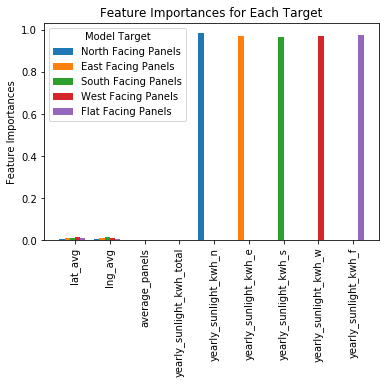

In [39]:
ind = np.arange(len(panels_n_importances))
width = .15

plt.bar(ind, panels_n_importances, width, label='North Facing Panels')
plt.bar(ind+width, panels_e_importances, width, label='East Facing Panels')
plt.bar(ind+2*(width), panels_s_importances, width, label='South Facing Panels')
plt.bar(ind+3*(width), panels_w_importances, width, label='West Facing Panels')
plt.bar(ind+4*(width), panels_f_importances, width, label='Flat Facing Panels')

plt.ylabel('Feature Importances')
plt.title('Feature Importances for Each Target')

plt.xticks(ind+(5*(width)/2), X_train.columns, rotation='vertical') 

plt.legend(title='Model Target', loc='best')
plt.show()